# Milestone 3 Notebook

### Imports

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# additional library
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as pltfrom
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


### Notebook Parameters

In [3]:
output_img = False

## Table of Contents

1. **[Data Overview](#data-overview)**
    - 1.1 [Data Description](#data-description)
    - 1.2 [Data Summary](#data-summary)
2. **[Exploratory Data Analysis](#exploratory-data-analysis)**
    - 3.1 [Deeper Understanding of the Data](#deeper-understanding-of-the-data)
    - 3.2 [Meaningful Insights](#meaningful-insights)
    - 3.3 [Noteworthy Findings](#noteworthy-findings)
3. **[Research Question](#research-question)**
4. **[Baseline Model](#baseline-model)**


## Data Overview

### Data Description

In [4]:
X_train = pd.read_csv('./data/prod/X_train.csv')
y_train = pd.read_csv('./data/prod/y_train.csv')
X_test = pd.read_csv('./data/prod/X_test.csv')
y_test = pd.read_csv('./data/prod/y_test.csv')
data_dictionary = pd.read_csv('./data/raw/data_dictionary.csv')
pd.set_option('display.max_columns', None)  #Make it display all columns

In [5]:
# Preview the Data
X_train.head()

,customer_id,perc_change_minutes,perc_change_revenues,dropped_calls,unanswered_calls,received_calls,months_in_service,unique_subs,active_subs,handsets,handset_models,current_equipment_days,age_hh1,age_hh2,children_in_hh,handset_refurbished,handset_web_capable,truck_owner,rv_owner,homeownership,buys_via_mail_order,responds_to_mail_offers,opt_out_mailings,non_us_travel,owns_computer,has_credit_card,retention_calls,retention_offers_accepted,new_cellphone_user,referrals_made_by_subscriber,income_group,owns_motorcycle,adjustments_to_credit_rating,handset_price,made_call_to_retention_team,credit_rating,total_care_issues,overall_revenue,overall_usage,value_added_service_usage,total_calls,total_peak_off_peak_calls,prizm_code_Rural,prizm_code_Suburban,prizm_code_Town,occupation_Crafts,occupation_Homemaker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Self,occupation_Student,marital_status_Unknown,marital_status_Yes,retention_calls_is_zero,retention_offers_accepted_is_zero,referrals_made_by_subscriber_is_zero,income_group_is_zero,adjustments_to_credit_rating_is_zero,perc_change_revenues_is_zero,dropped_calls_is_zero,unanswered_calls_is_zero,received_calls_is_zero,age_hh1_is_zero,age_hh2_is_zero,total_care_issues_is_zero,value_added_service_usage_is_zero,total_calls_is_zero,total_peak_off_peak_calls_is_zero
0,3153578,98.0,0.2,2.3,9.7,50.3,16,1,1,1.0,1.0,501.0,26.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,4,0,0,71.06962,0,2,2.6,78.81,210.0,1.00,5.7,67.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0
1,3163414,-38.0,-0.4,3.0,10.3,95.1,16,1,1,1.0,1.0,478.0,46.0,0.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,8,0,0,71.06962,0,2,4.7,103.70,210.0,0.00,33.3,91.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0
2,3348322,13.0,-0.9,6.3,10.0,7.2,10,1,1,1.0,1.0,291.0,58.0,58.0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,7,0,0,71.06962,0,2,9.7,84.88,87.9,0.70,1.3,41.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,3269774,0.0,0.0,0.0,0.0,0.0,13,1,1,1.0,1.0,384.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.06962,0,7,0.0,10.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,3283286,-122.0,-5.5,0.0,0.0,0.0,8,1,1,1.0,1.0,253.0,50.0,48.0,1,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,71.06962,0,2,0.0,77.54,427.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,1


In [6]:
#Data size
print("Train Data Dimensions:", X_train.shape)
print(f"Test Data Dimensions:", X_test.shape)
print (f"Train Split Size: {round(X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]), 4)}")

Train Data Dimensions: (20520, 69)
Test Data Dimensions: (5131, 69)
Train Split Size: 0.8


In [7]:
#Descriptive Statistics
X_train.describe().round(2)

,customer_id,perc_change_minutes,perc_change_revenues,dropped_calls,unanswered_calls,received_calls,months_in_service,unique_subs,active_subs,handsets,handset_models,current_equipment_days,age_hh1,age_hh2,children_in_hh,handset_refurbished,handset_web_capable,truck_owner,rv_owner,homeownership,buys_via_mail_order,responds_to_mail_offers,opt_out_mailings,non_us_travel,owns_computer,has_credit_card,retention_calls,retention_offers_accepted,new_cellphone_user,referrals_made_by_subscriber,income_group,owns_motorcycle,adjustments_to_credit_rating,handset_price,made_call_to_retention_team,credit_rating,total_care_issues,overall_revenue,overall_usage,value_added_service_usage,total_calls,total_peak_off_peak_calls,prizm_code_Rural,prizm_code_Suburban,prizm_code_Town,occupation_Crafts,occupation_Homemaker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Self,occupation_Student,marital_status_Unknown,marital_status_Yes,retention_calls_is_zero,retention_offers_accepted_is_zero,referrals_made_by_subscriber_is_zero,income_group_is_zero,adjustments_to_credit_rating_is_zero,perc_change_revenues_is_zero,dropped_calls_is_zero,unanswered_calls_is_zero,received_calls_is_zero,age_hh1_is_zero,age_hh2_is_zero,total_care_issues_is_zero,value_added_service_usage_is_zero,total_calls_is_zero,total_peak_off_peak_calls_is_zero
count,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.0,20520.00,20520.0,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00,20520.00
mean,3192916.70,-7.14,-0.89,2.42,12.23,36.80,19.26,1.57,1.40,1.50,1.36,444.75,35.86,26.38,0.27,0.11,0.87,0.21,0.09,0.73,0.42,0.44,0.02,0.07,0.23,0.73,0.02,0.01,0.19,0.04,4.77,0.01,0.04,70.91,0.02,2.55,5.87,78.49,242.39,0.72,12.85,67.40,0.05,0.34,0.17,0.03,0.00,0.69,0.21,0.02,0.02,0.01,0.33,0.43,0.98,0.99,0.96,0.2,0.97,0.2,0.23,0.14,0.19,0.22,0.45,0.16,0.40,0.18,0.11
std,115677.81,83.30,3.73,2.87,13.14,48.49,9.58,1.62,0.75,0.84,0.64,260.54,23.23,28.70,0.44,0.32,0.34,0.41,0.29,0.45,0.49,0.50,0.14,0.25,0.42,0.44,0.17,0.11,0.39,0.22,3.05,0.12,0.36,32.04,0.15,1.44,6.36,33.64,206.72,0.99,15.43,61.89,0.22,0.47,0.37,0.18,0.05,0.46,0.41,0.14,0.14,0.09,0.47,0.50,0.15,0.11,0.19,0.4,0.17,0.4,0.42,0.35,0.39,0.41,0.50,0.37,0.49,0.39,0.31
min,3000010.00,-329.00,-12.80,0.00,0.00,0.00,6.00,1.00,0.00,1.00,1.00,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,1.00,0.00,-12.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3091764.00,-45.00,-1.70,0.30,2.30,1.20,11.00,1.00,1.00,1.00,1.00,260.00,26.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,71.07,0.00,2.00,1.00,60.50,83.00,0.00,1.00,17.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.0,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3186958.00,-4.00,-0.20,1.30,8.00,16.80,17.00,1.00,1.00,1.00,1.00,386.00,40.00,28.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00,71.07,0.00,2.00,4.00,74.40,194.00,0.30,7.00,52.70,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.0,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3294300.00,29.00,0.00,3.70,17.70,53.92,25.00,2.00,2.00,2.00,2.00,604.00,50.00,46.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,71.07,0.00,3.00,8.60,98

In [8]:
#Data Types and missingness
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20520 entries, 0 to 20519
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           20520 non-null  int64  
 1   perc_change_minutes                   20520 non-null  float64
 2   perc_change_revenues                  20520 non-null  float64
 3   dropped_calls                         20520 non-null  float64
 4   unanswered_calls                      20520 non-null  float64
 5   received_calls                        20520 non-null  float64
 6   months_in_service                     20520 non-null  int64  
 7   unique_subs                           20520 non-null  int64  
 8   active_subs                           20520 non-null  int64  
 9   handsets                              20520 non-null  float64
 10  handset_models                        20520 non-null  float64
 11  current_equipme

In [9]:
#No. Of missing vablues per variable
X_train.isnull().sum()

customer_id                          0
perc_change_minutes                  0
perc_change_revenues                 0
dropped_calls                        0
unanswered_calls                     0
                                    ..
age_hh2_is_zero                      0
total_care_issues_is_zero            0
value_added_service_usage_is_zero    0
total_calls_is_zero                  0
total_peak_off_peak_calls_is_zero    0
Length: 69, dtype: int64

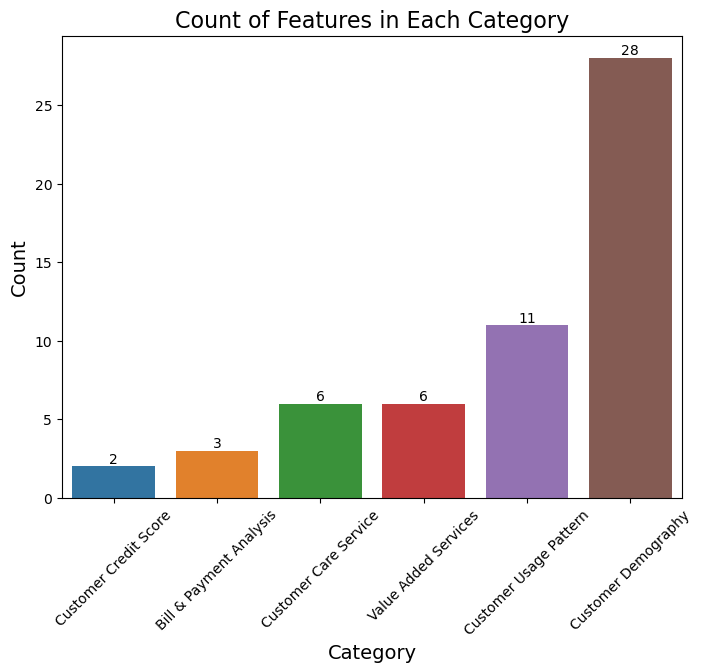

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_data = data_dictionary[~data_dictionary['Category'].isin(['Customer ID', "Response Variable"])]
_ = sns.countplot(
    x='Category', 
    data=plot_data,
    order=plot_data['Category'].value_counts(ascending=True).index
)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha = 'center', va = 'center',   
        xytext=(0, 5),                  
        textcoords='offset points'      
    )
ax.set_title("Count of Features in Each Category", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Category", fontsize=14)
plt.xticks(rotation=45);

if output_img:
    plt.savefig('./img/m3_fig0.png', bbox_inches='tight')

### Data Summary

In [11]:
from utils.helper import get_variable_category

discrete_vars, categorical_vars, continuous_vars, binary_vars, id_vars = get_variable_category(X_train)

In [12]:
print (f"Number of Discrete Variables: {len(discrete_vars)}")
print (f"Number of Categorical Variables: {len(categorical_vars)}")
print (f"Number of Continuous Variables: {len(continuous_vars)}")
print (f"Number of Binary Variables: {len(binary_vars)}")
print (f"Number of ID Variables: {len(id_vars)}")

Number of Discrete Variables: 8
Number of Categorical Variables: 0
Number of Continuous Variables: 18
Number of Binary Variables: 42
Number of ID Variables: 1


In [13]:
# Sanity Check
assert (
    len(binary_vars) + 
    len(categorical_vars) + 
    len(discrete_vars) + 
    len(id_vars) +
    len(continuous_vars) == len(X_train.columns)
)

#### Discrete Variables

In [14]:
discrete_vars[1:]

['handsets',
 'handset_models',
 'retention_calls',
 'retention_offers_accepted',
 'referrals_made_by_subscriber',
 'income_group',
 'credit_rating']

In [15]:
def split_camel_case(text: str) -> str:
    """
    Splits an upper camel case string into words.

    Args:
        text: A string in upper camel case.

    Returns:
        A string with words separated by spaces.
    """
    res = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z][a-z]|$)', text)
    return ' '.join(res) 

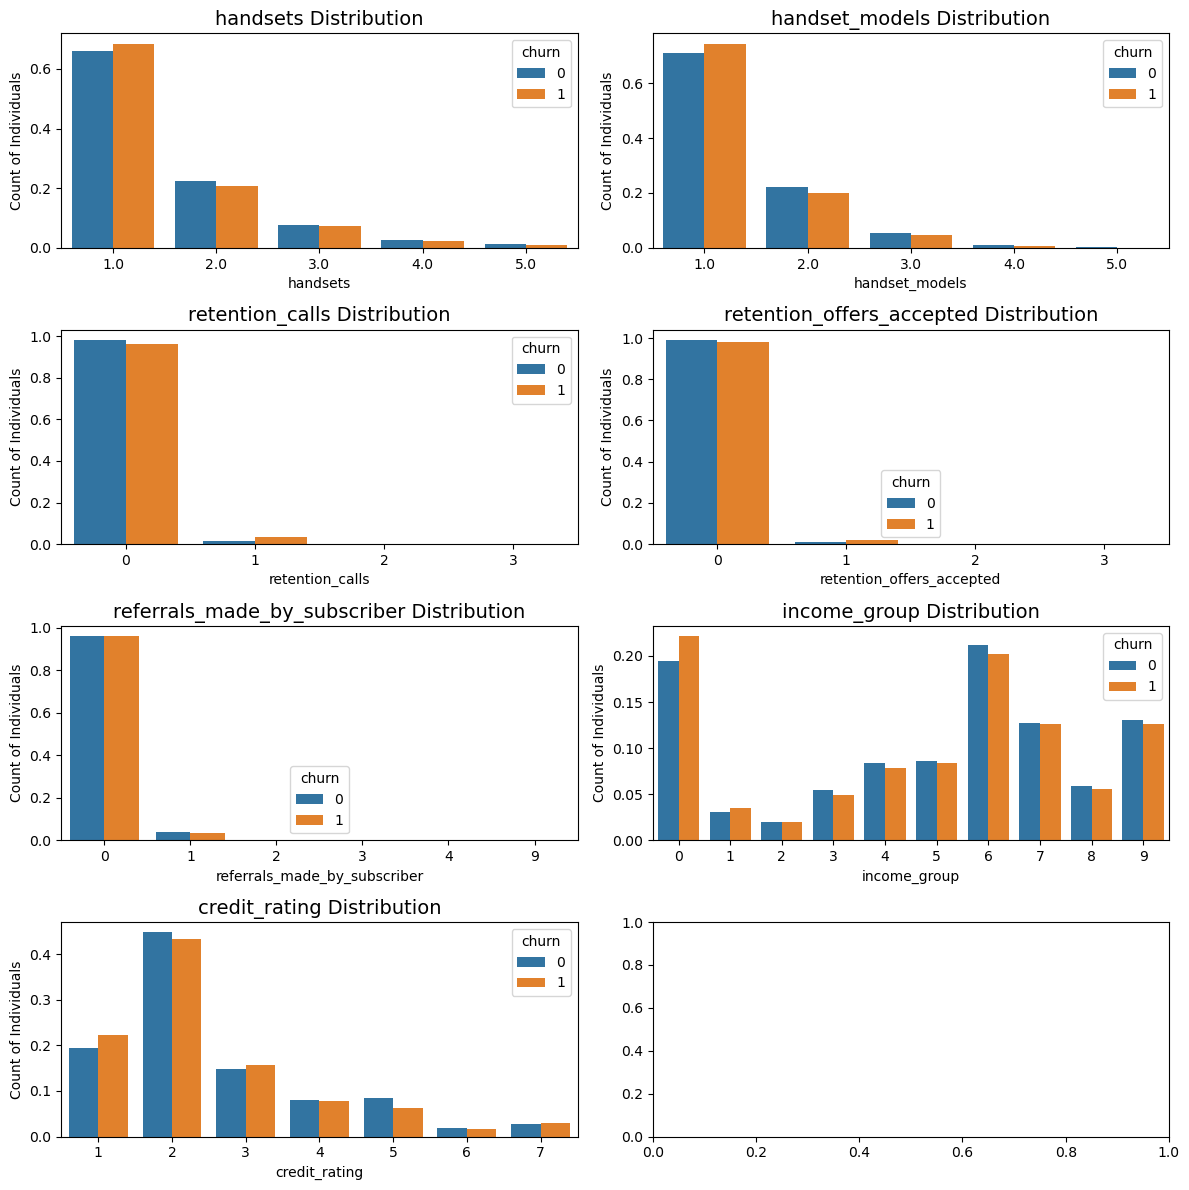

In [16]:
train = pd.concat([X_train, y_train], axis=1)

fig, ax = plt.subplots(4, 2, figsize=(12, 12))

for ax, column in zip(ax.ravel(), discrete_vars[1:]): # Drop ID
    counts = train[[column, "churn"]].groupby('churn').value_counts(normalize=True).reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='proportion', data=counts, ax=ax, hue="churn")
    ax.set_title(f'{column} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    if counts[column].nunique() > 10:
        x_ticks = ax.get_xticks()
        ax.set_xticks(x_ticks[::2])

plt.tight_layout()

In [17]:
if output_img:
    fig.savefig('./img/m3_fig1.png', format='png', dpi=300, bbox_inches='tight')

#### Categorical Variables

In [18]:
categorical_vars

[]

In [19]:
# fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# axes = ax.ravel()
# for ax, column in zip(axes, categorical_vars): # Drop Service Area
#     counts = train[[column, "Churn"]].groupby('Churn').value_counts(normalize=True).reset_index()
#     counts = counts.sort_values(column)

#     sns.barplot(x=column, y='proportion', hue="Churn", data=counts, ax=ax)
#     ax.set_title(f'{split_camel_case(column)} Distribution', fontsize=14)
#     ax.set_ylabel('Count of Individuals')
#     ax.set_xlabel(column)
#     ax.tick_params(axis='x', rotation=45)

# axes[-1].set_visible(False)

# plt.tight_layout()

In [20]:
# if output_img:
#     fig.savefig('./img/m3_fig2.png', format='png', dpi=300, bbox_inches='tight')

#### Continous Variables

In [21]:
continuous_vars

['perc_change_minutes',
 'perc_change_revenues',
 'dropped_calls',
 'unanswered_calls',
 'received_calls',
 'months_in_service',
 'unique_subs',
 'current_equipment_days',
 'age_hh1',
 'age_hh2',
 'adjustments_to_credit_rating',
 'handset_price',
 'total_care_issues',
 'overall_revenue',
 'overall_usage',
 'value_added_service_usage',
 'total_calls',
 'total_peak_off_peak_calls']

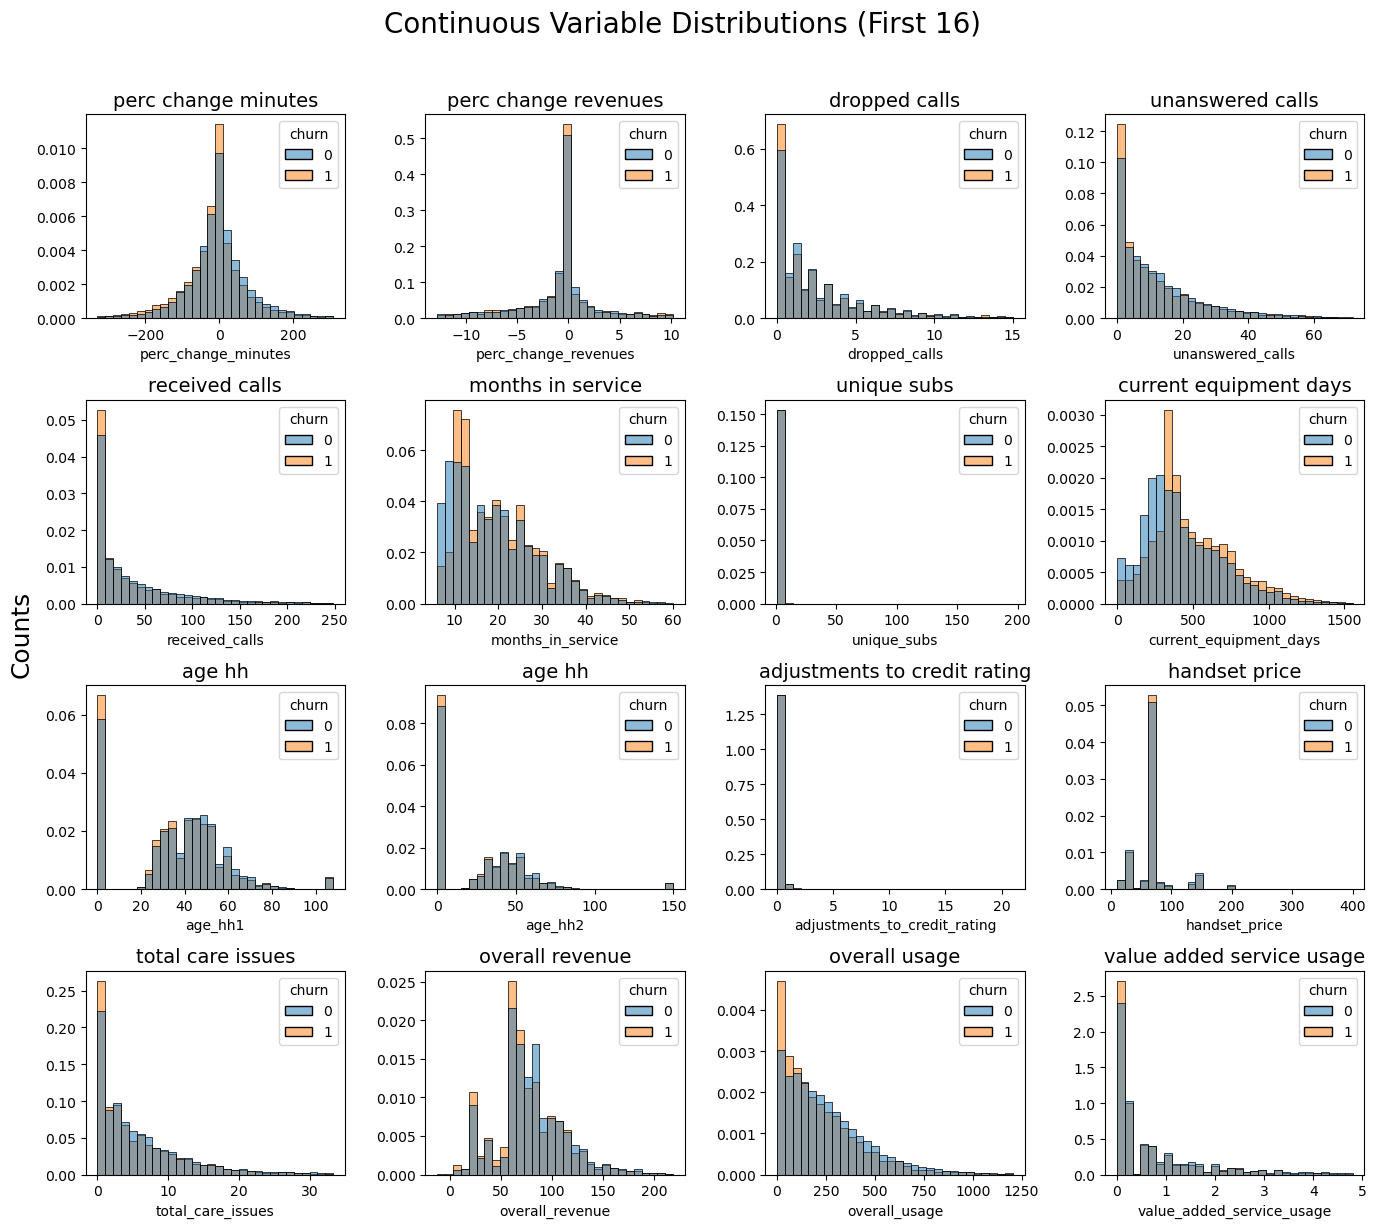

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(14, 12))

for ax, column in zip(ax.ravel(), continuous_vars[:16]):
    sns.histplot(
        x=column, 
        data=train[[column, "churn"]], 
        bins=30, 
        ax=ax, 
        hue="churn", 
        stat="density", 
        common_norm=False
    )
    ax.set_title(f'{split_camel_case(column)}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel(column)
fig.supylabel('Counts', fontsize=18)
fig.suptitle('Continuous Variable Distributions (First 16)', fontsize=20, y=1.02)
plt.tight_layout()

In [23]:
if output_img:
    fig.savefig('./img/m3_fig3a.png', format='png', dpi=300, bbox_inches='tight')

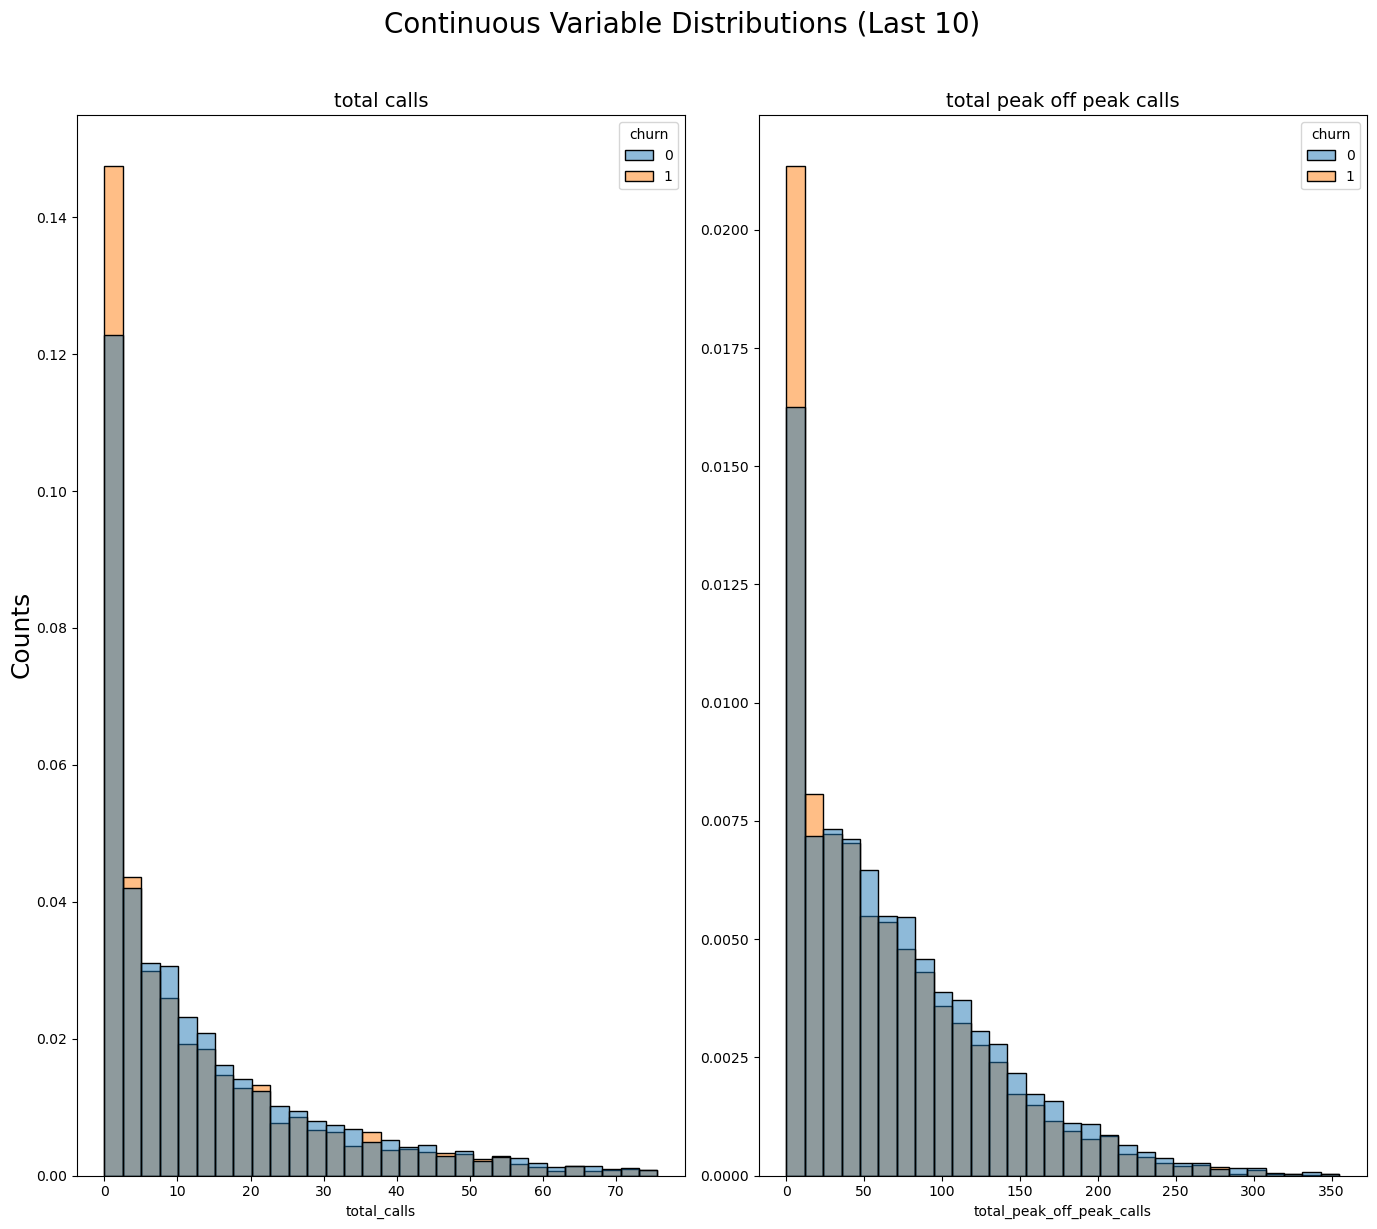

In [24]:
# Sorry for the redundant code
fig, ax = plt.subplots(1, 2, figsize=(14, 12))

axes = ax.ravel()
for ax, column in zip(axes, continuous_vars[16:]):
    sns.histplot(
        x=column, 
        data=train[[column, "churn"]], 
        bins=30, 
        ax=ax, 
        hue="churn", 
        stat="density", 
        common_norm=False
    )
    ax.set_title(f'{split_camel_case(column)}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel(column)
fig.supylabel('Counts', fontsize=18)
fig.suptitle('Continuous Variable Distributions (Last 10)', fontsize=20, y=1.02)
# axes[-1].set_visible(False)
# axes[-2].set_visible(False)
plt.tight_layout()

In [25]:
if output_img:
    fig.savefig('./img/m3_fig3b.png', format='png', dpi=300, bbox_inches='tight')

##### Box Plots

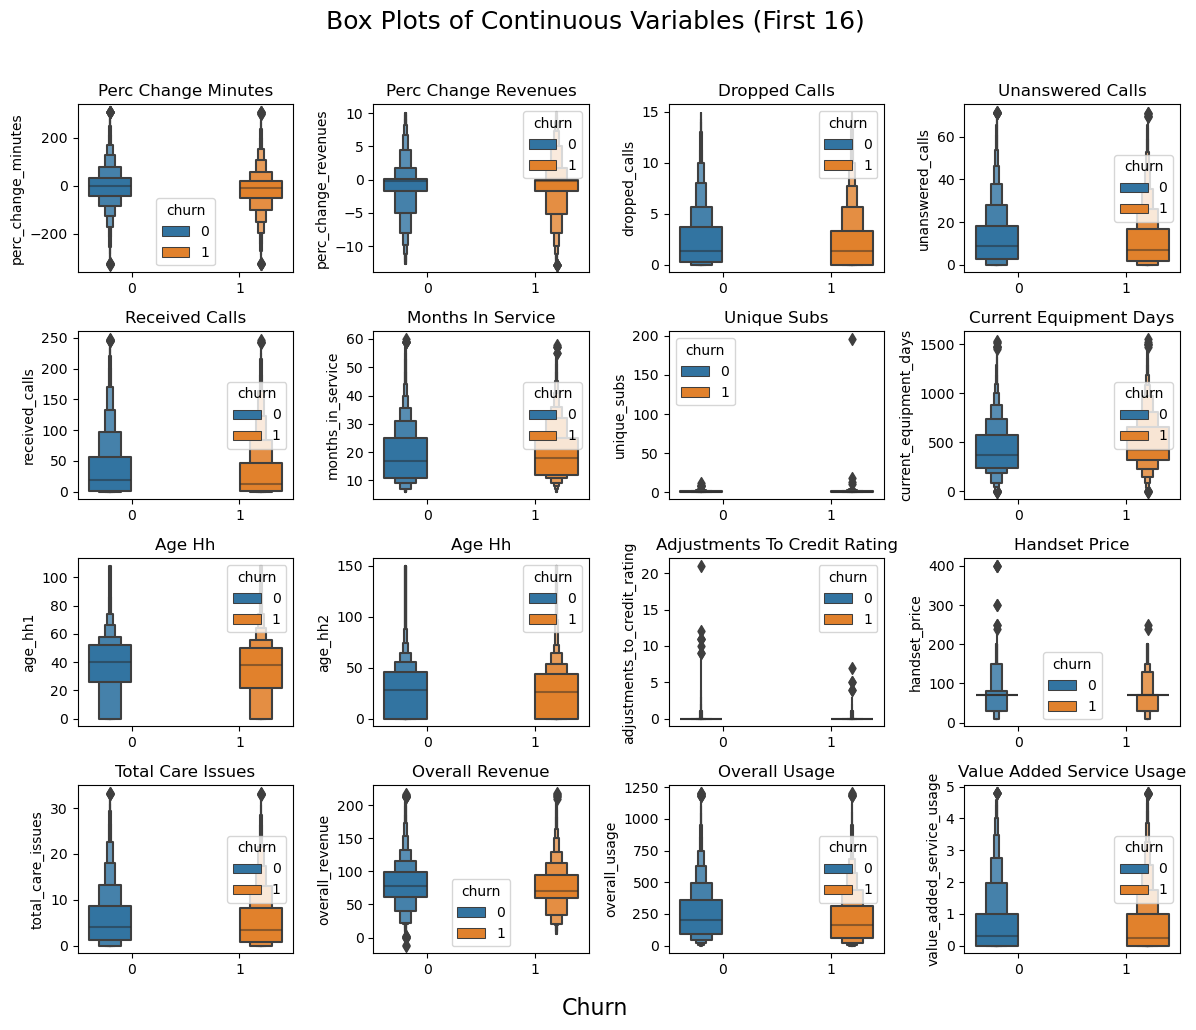

In [26]:
fig, ax = plt.subplots(4, 4, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(), continuous_vars[:16]):

    _=sns.boxenplot(
        x="churn", 
        y=feature, 
        data=train,
        hue='churn', 
        ax=ax
    )
    ax.set_title(split_camel_case(feature).title())
    ax.set_xlabel("")

plt.suptitle("Box Plots of Continuous Variables (First 16)", fontsize = 18, y=1.02)
fig.supxlabel("Churn", fontsize=16)
plt.tight_layout()

In [27]:
if output_img:
    fig.savefig('./img/m3_fig3c.png', format='png', dpi=300, bbox_inches='tight')

#### Binary Variables

In [28]:
# Drop Response Variable - Churn
binary_vars[1:]

# Remove zero-inflated dummies
binary_vars_to_plot = [var for var in binary_vars if var.split("_")[-1] != 'zero']
binary_vars_to_plot

['children_in_hh',
 'handset_refurbished',
 'handset_web_capable',
 'truck_owner',
 'rv_owner',
 'homeownership',
 'buys_via_mail_order',
 'responds_to_mail_offers',
 'opt_out_mailings',
 'non_us_travel',
 'owns_computer',
 'has_credit_card',
 'new_cellphone_user',
 'owns_motorcycle',
 'made_call_to_retention_team',
 'prizm_code_Rural',
 'prizm_code_Suburban',
 'prizm_code_Town',
 'occupation_Crafts',
 'occupation_Homemaker',
 'occupation_Other',
 'occupation_Professional',
 'occupation_Retired',
 'occupation_Self',
 'occupation_Student',
 'marital_status_Unknown',
 'marital_status_Yes']

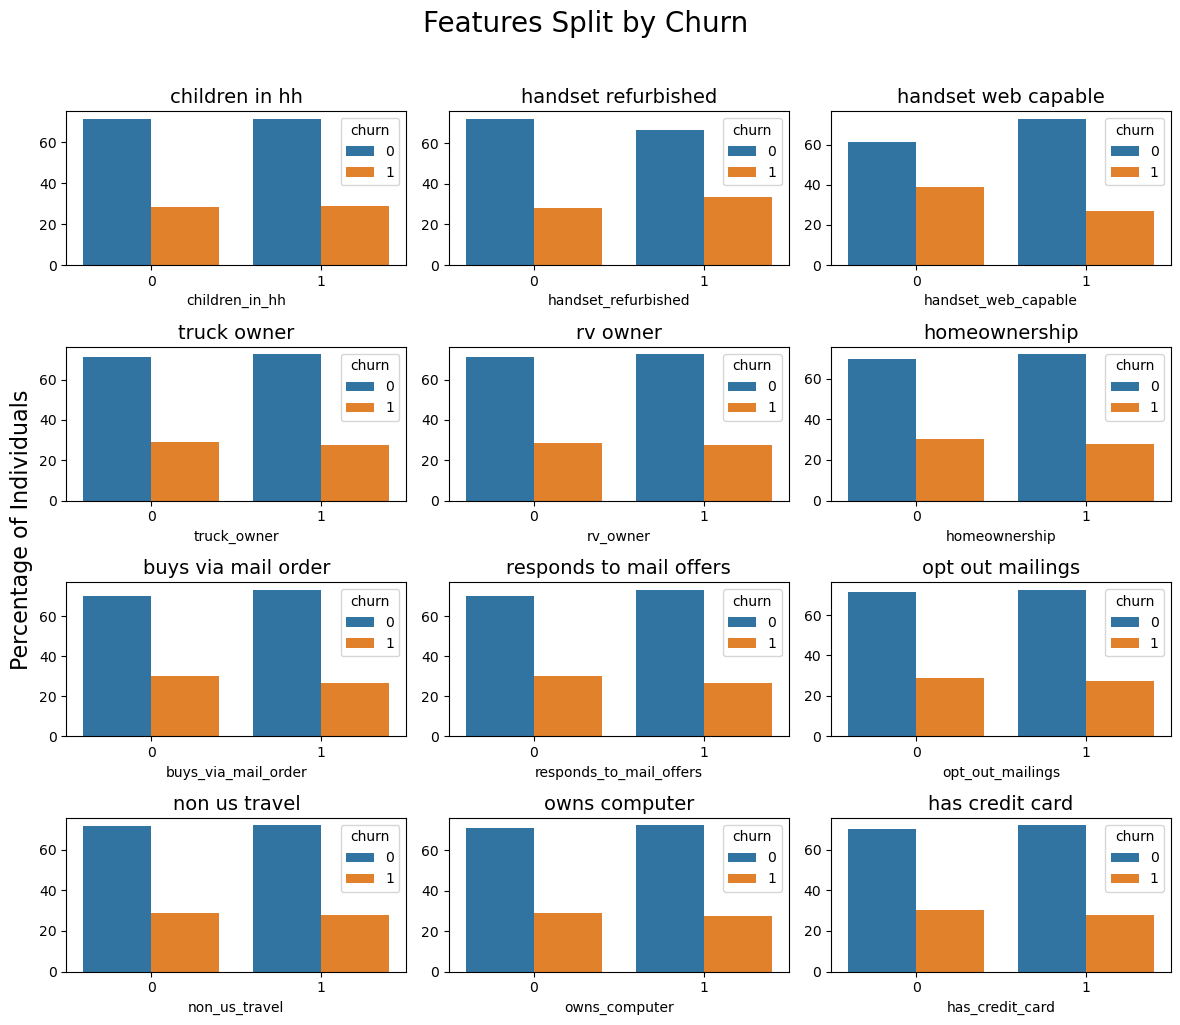

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(),binary_vars_to_plot[:12]): # Drop Response Variable - Churn
    plot_data = train[[feature, "churn"]]
    grouped_data = plot_data.groupby([feature, "churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_camel_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(f"{feature}")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

In [30]:
if output_img:
    fig.savefig('./img/m3_fig4.png', format='png', dpi=300, bbox_inches='tight')

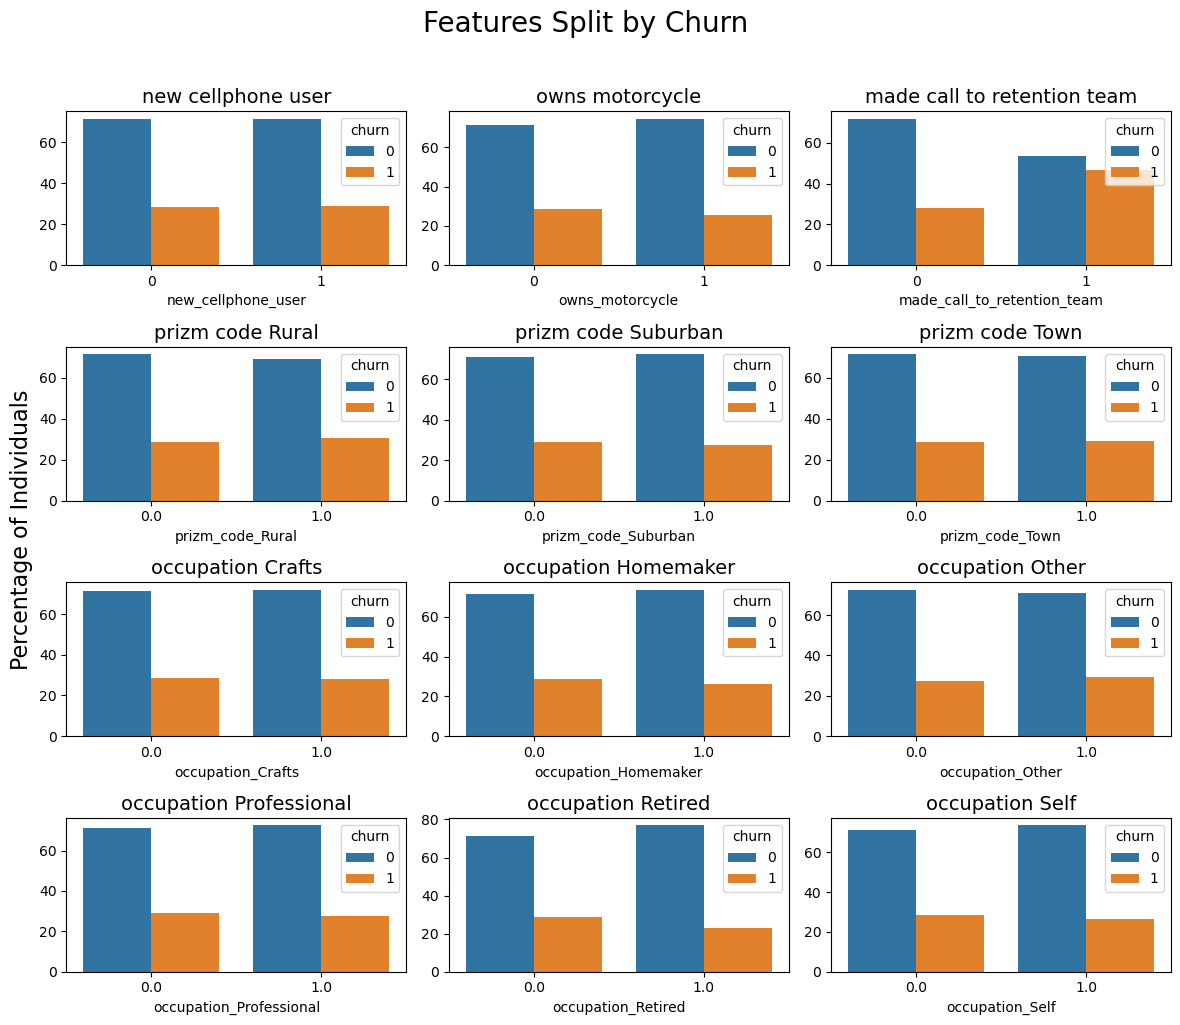

In [31]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(),binary_vars_to_plot[12:]): # Drop Response Variable - Churn
    plot_data = train[[feature, "churn"]]
    grouped_data = plot_data.groupby([feature, "churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_camel_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(f"{feature}")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

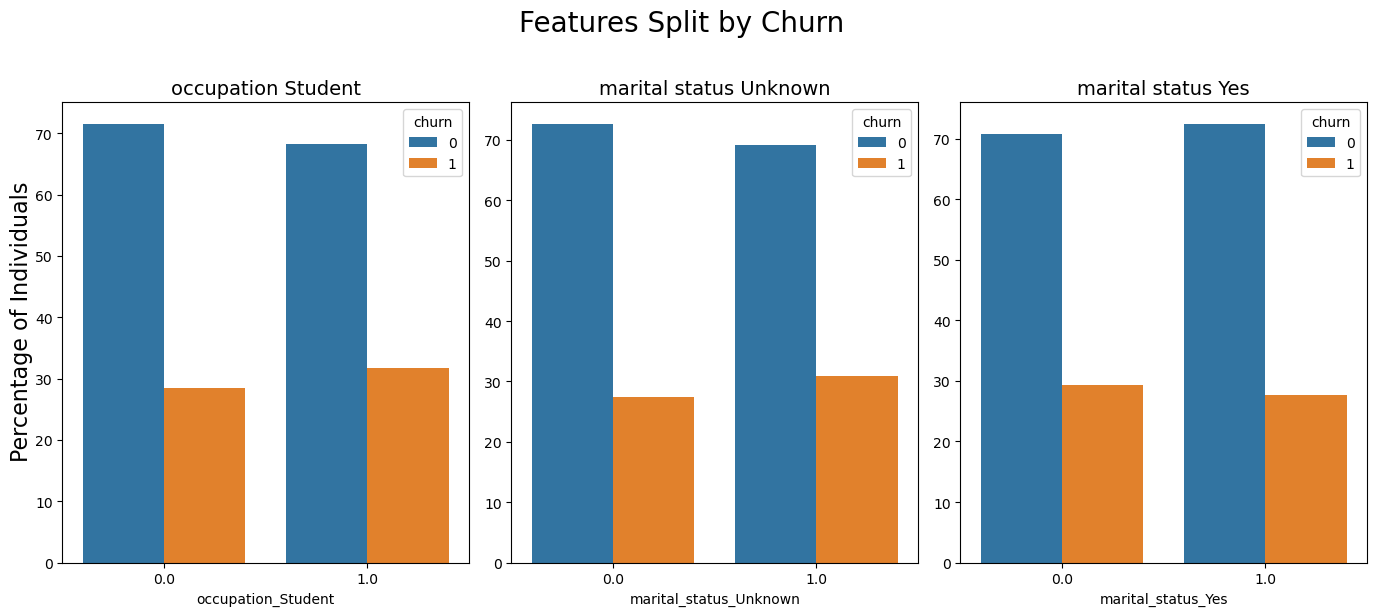

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))  

for ax, feature in zip(ax.ravel(),binary_vars_to_plot[24:]): # Drop Response Variable - Churn
    plot_data = train[[feature, "churn"]]
    grouped_data = plot_data.groupby([feature, "churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_camel_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(f"{feature}")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

## Exploratory Data Analysis

### Deeper Understanding of the Data

*While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.*

1. Trends: We explored the trend using the only temporal feature "MonthsInService"
   - Initial drop: The churn rate starts around 0.2, drops slightly.
   - Sharp increase: The churn rate increases sharply around the 10 month mark. This could indicate that the users may have some sort of contract that binds them for 10 months.
   - Stablizes: After the spike on the 10th month, churn rate slightly declines and stabilize hovering over 0.2 ~ 0.4 over the next several months.
   - Large fluctuation >50 months: Twards the end, the data shows heavy fluctuation and a spike at the end indicating a potential outlier.
3. Class imbalance: Class imbalance was previously identified and handeled in MS2
4. Outliers:
   - We can identify from the box plot and distribution plots that there are outliers in the dataset. Instead of removing the outliers right now, we'll use different methods such as (1) Cook's distance (if using linear regression) and (2) principal component analysis (PCA) to handle outliers. 
5. Relationship between variables:
   We found strong correlations between features that can lead to multicollinearity. (both shown in the heatmap and pairplots) Later we'll explore methods such as (1) removing one of the correlated features, (2) PCA, (3) feature selection to determine the best method to handle multicollinearity issue.
   - MonthlyRevenue & OverageMinutes: 0.786
   - MonthlyRevenue & MonthlyMinutes: 0.710
   - MonthlyMinutes & ReceivedCalls: 0.828


   However, we didn't find any feature that has direct correlation with Churn. This is interesting as we were expecting at least a weak correlation between some features and churn. It suggests that chrun might depend on more complex interactions between multiple features. 

#### Trends

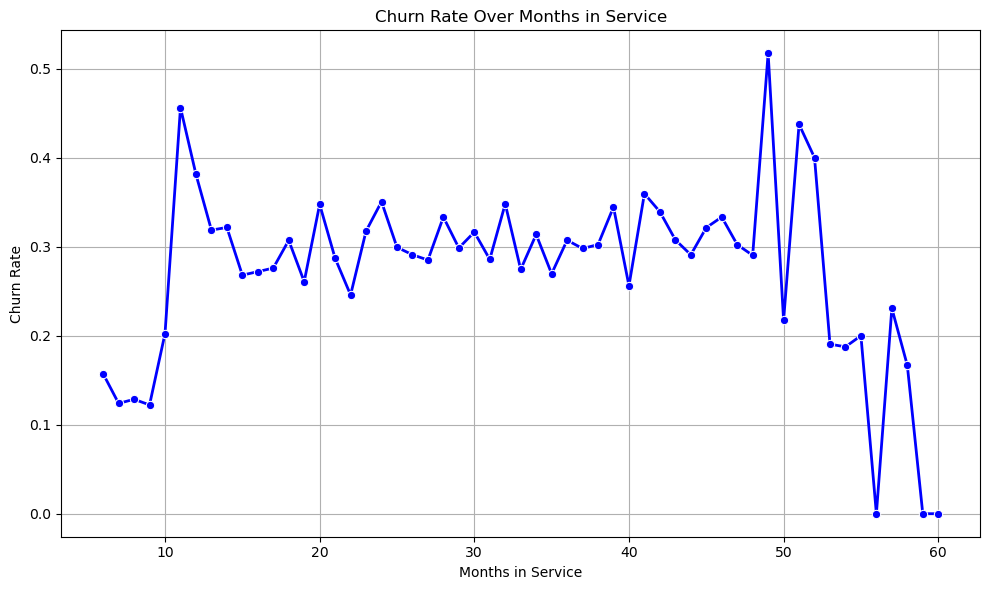

In [33]:
# Identifying the trend using time trended variable: "MonthsInSerivce"

monthly_churn_rate = train.groupby('months_in_service')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='months_in_service', y='churn', data=monthly_churn_rate, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.title('Churn Rate Over Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.tight_layout();

if output_img:
    plt.savefig('./img/m3_fig5.png', format='png', dpi=300, bbox_inches='tight')



#### Correlation Matrices

In [34]:
batches = list(zip(list(range(0, len(continuous_vars)+1, 6)), list(range(0, len(continuous_vars)+1, 6))[1:]))

In [35]:
len(continuous_vars)

18

In [36]:
batches

[(0, 6), (6, 12), (12, 18)]

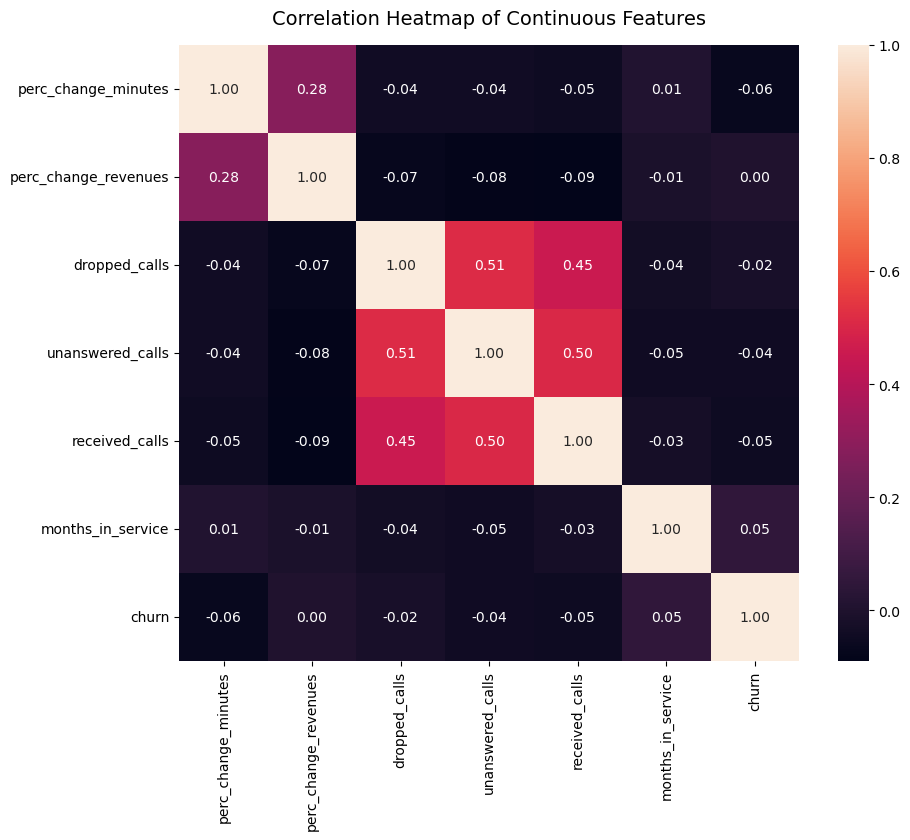

Strong correlations:
                       perc_change_minutes  perc_change_revenues  \
perc_change_minutes                   1.0                   NaN   
perc_change_revenues                  NaN                   1.0   
dropped_calls                         NaN                   NaN   
unanswered_calls                      NaN                   NaN   
received_calls                        NaN                   NaN   
months_in_service                     NaN                   NaN   
churn                                 NaN                   NaN   

                      dropped_calls  unanswered_calls  received_calls  \
perc_change_minutes             NaN               NaN             NaN   
perc_change_revenues            NaN               NaN             NaN   
dropped_calls                   1.0               NaN             NaN   
unanswered_calls                NaN               1.0             NaN   
received_calls                  NaN               NaN             1.0   
mon

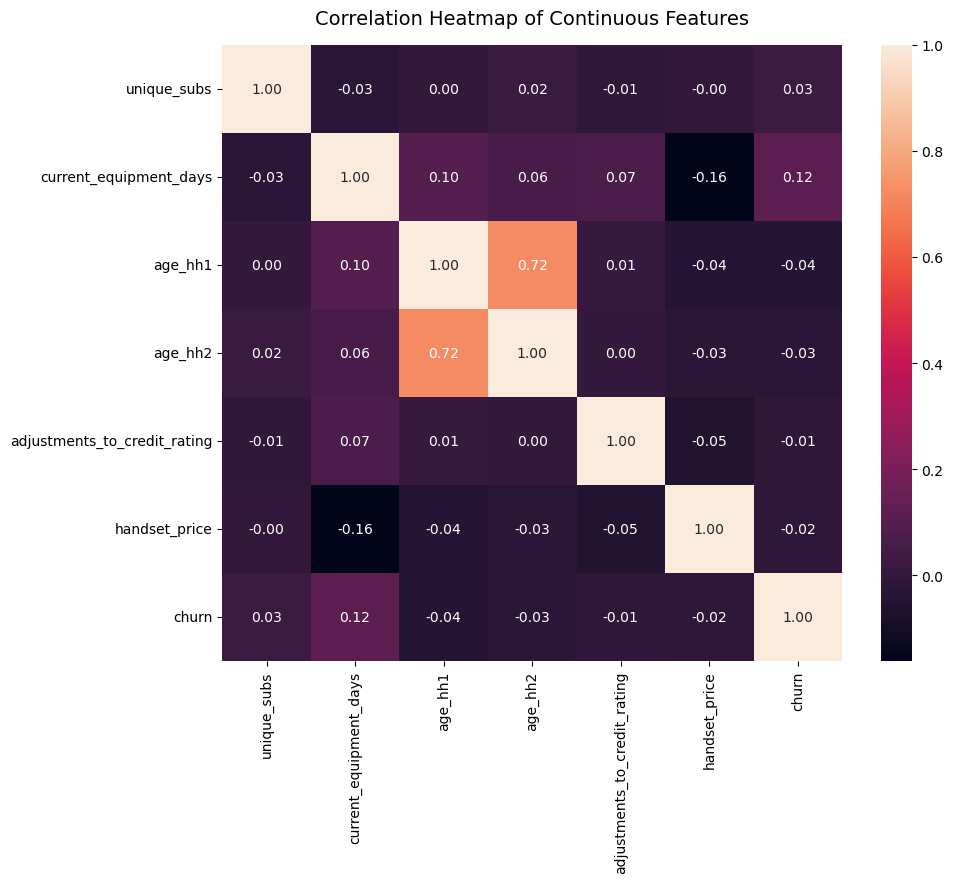

Strong correlations:
                               unique_subs  current_equipment_days   age_hh1  \
unique_subs                           1.0                     NaN       NaN   
current_equipment_days                NaN                     1.0       NaN   
age_hh1                               NaN                     NaN  1.000000   
age_hh2                               NaN                     NaN  0.722293   
adjustments_to_credit_rating          NaN                     NaN       NaN   
handset_price                         NaN                     NaN       NaN   
churn                                 NaN                     NaN       NaN   

                               age_hh2  adjustments_to_credit_rating  \
unique_subs                        NaN                           NaN   
current_equipment_days             NaN                           NaN   
age_hh1                       0.722293                           NaN   
age_hh2                       1.000000                   

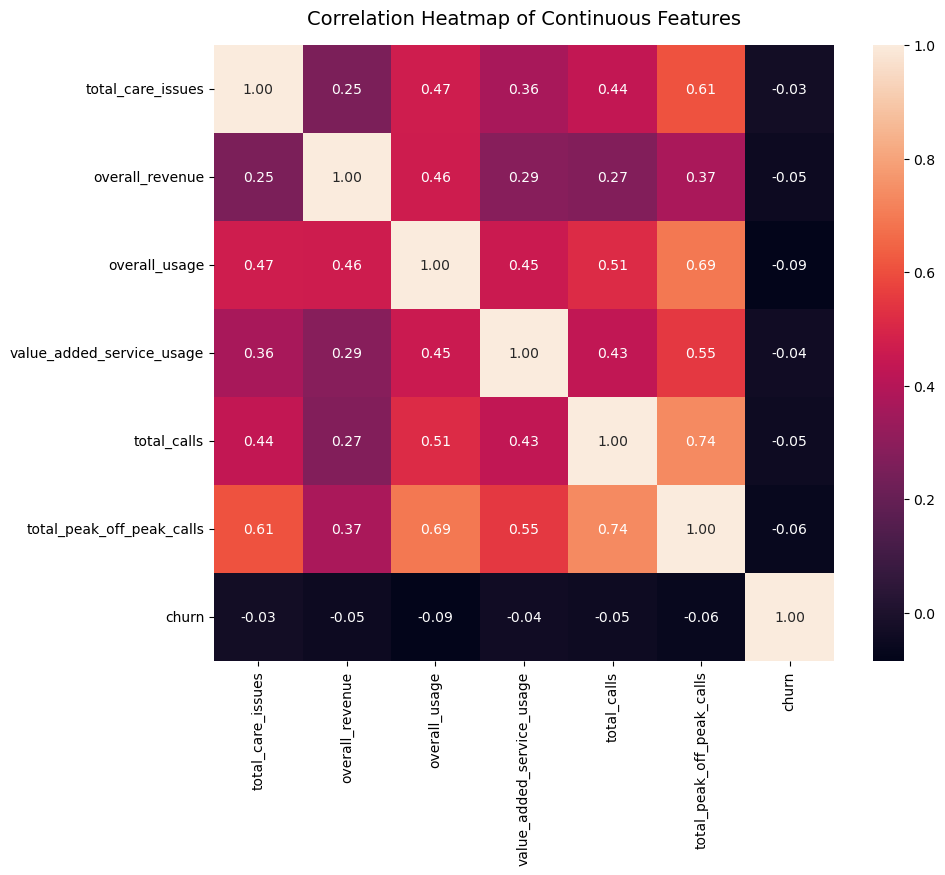

Strong correlations:
                            total_care_issues  overall_revenue  overall_usage  \
total_care_issues                   1.000000              NaN            NaN   
overall_revenue                          NaN              1.0            NaN   
overall_usage                            NaN              NaN        1.00000   
value_added_service_usage                NaN              NaN            NaN   
total_calls                              NaN              NaN            NaN   
total_peak_off_peak_calls           0.608967              NaN        0.69385   
churn                                    NaN              NaN            NaN   

                           value_added_service_usage  total_calls  \
total_care_issues                                NaN          NaN   
overall_revenue                                  NaN          NaN   
overall_usage                                    NaN          NaN   
value_added_service_usage                        1.0         

In [37]:
# Correlation heatmap for continuous variables

for letter, batch in zip(string.ascii_lowercase, batches):
    correlation_matrix = pd.concat([train[continuous_vars[batch[0]:batch[1]]], train['churn']], axis=1).corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))  
    sns.heatmap(
        correlation_matrix, 
        annot=True,
        fmt=".2f",
        ax=ax
    )
    ax.set_title('Correlation Heatmap of Continuous Features', fontsize=14, y=1.02)
    plt.show();

    # Identify strong correlations (greater than 0.6 or less than -0.6)
    strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
    print("Strong correlations:\n", strong_corr)

    fig.savefig(f'./img/m3_fig6{letter}.png', format='png', dpi=300, bbox_inches='tight')

In [38]:
# Calculate correlations with response
correlations = train[continuous_vars].corrwith(train["churn"])

# Sort correlations in descending order (absolute values for strength)
sorted_correlations = correlations.abs().sort_values(ascending=False)
top5_features = list(sorted_correlations.head(5).index) + ["churn"]

c:\Users\Kai_R\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


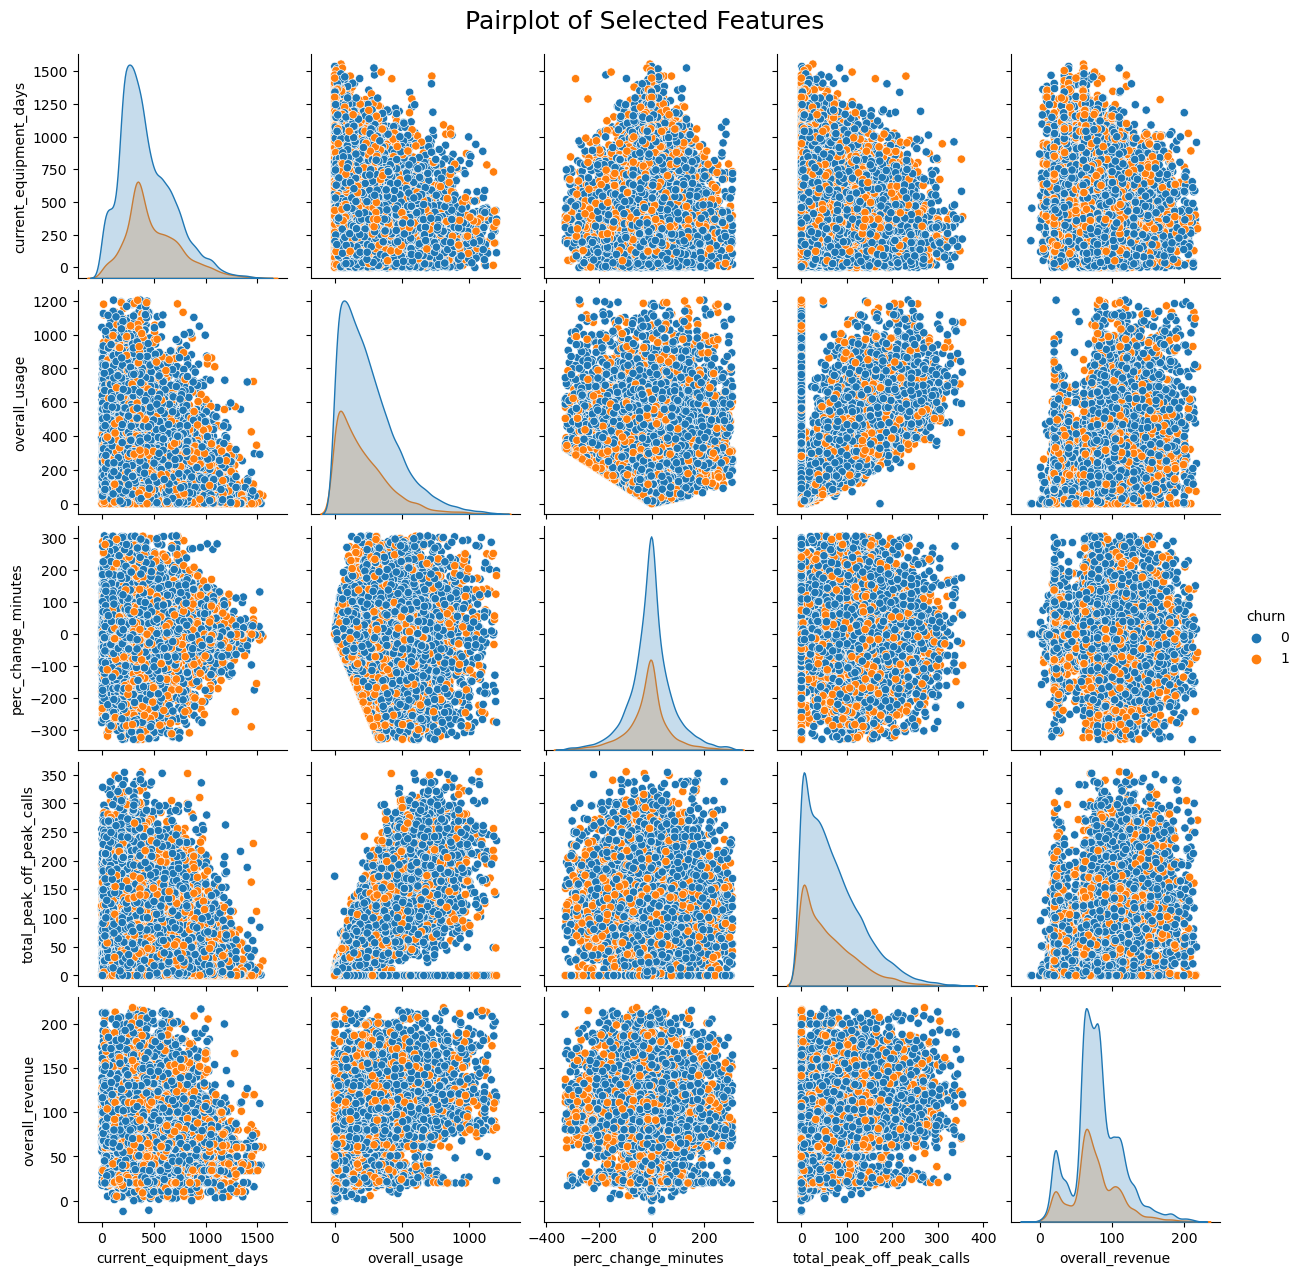

In [39]:
# Pairplot of selected features (can delete them if it is confusing)
pairplot = sns.pairplot(
    train[top5_features], 
    hue='churn'
)
plt.suptitle('Pairplot of Selected Features', fontsize=18, y=1.02)
plt.show()

In [40]:
if output_img:
    pairplot.savefig(f'./img/m3_fig7.png', format='png', dpi=300, bbox_inches='tight')

### Meaningful Insights

The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

### Noteworthy Findings

Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

### 1. Service Quality Impact
- Based on the correlation heatmap and pair plot, we don’t see a strong direct correlation between `DroppedCalls` and `Churn`. This suggests that while service quality could impact churn, `DroppedCalls` alone does not show a significant linear relationship with churn.

### 2. Financial Patterns
- **Revenue & Charges**: The correlation heatmap shows a strong relationship between `MonthlyRevenue` and `OverageMinutes` (0.79), as well as `MonthlyRevenue` and `MonthlyMinutes` (0.71). 
- **Churn Correlation**: There is a very weak or negligible correlation between financial variables like `MonthlyRevenue`, `TotalRecurringCharge`, and churn, suggesting that churn is likely influenced by more complex interactions of these variables rather than a single factor.

### 3. Demographic Insights
- **Credit Rating**: Credit rating distribution shows a higher density of churn among customers with a medium (2-High) credit rating.
- **Income Group**: Income Group 6 has the highest representation, while Income Group 0 shows a more varied churn rate.

### 4. Continuous Variables Analysis
- **Monthly Revenue**: The distribution is heavily right-skewed, with most customers having a monthly revenue below.
- **Monthly Minutes**: Similarly right-skewed, showing that most customers have low usage, but a few consume a large number of minutes.
- **Total Recurring Charge**: Right-skewed distribution suggests that most customers have low recurring charges.

### 5. Churn Trends Over Time
- **10-Month Spike**: The churn rate chart shows a significant increase around the 10-month mark, possibly indicating a contract or milestone prompting churn.
- **Long-Term Fluctuations**: After stabilizing around 20-40% for most of the service period, churn rate experiences fluctuations after 50 months, with a sharp peak at the end. 

### 6. Correlation Insights
- **Feature Correlations**: The heatmap shows strong correlations between features like `MonthlyRevenue` & `OverageMinutes` (0.79) and `MonthlyMinutes` & `ReceivedCalls` (0.83), indicating potential multicollinearity, which might need addressing in modeling.
- **No Strong Correlation with Churn**: None of the variables exhibit a strong correlation with churn.


## Research Question

Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

1. **"What variables influence churn, and how can these factors be effectively used to predict customer churn?"**

2. **"How do service usage patterns and financial characteristics, such as monthly revenue and overage charges, impact customer churn rates?"**

3. **"What role do demographic factors (such as income, location, and credit rating) play in predicting customer churn?"**



## Baseline Model

### Naive Model

In [41]:
naive_model = DummyClassifier(strategy="stratified")
naive_model.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [42]:
y_pred_naive = naive_model.predict(X_train)

In [43]:
print ("Naive Model")
print (classification_report(y_train, y_pred_naive))


Naive Model
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     14663
           1       0.29      0.29      0.29      5857

    accuracy                           0.59     20520
   macro avg       0.50      0.50      0.50     20520
weighted avg       0.60      0.59      0.60     20520



### Logistic Regression
This section focuses on the development and evaluation of Logistic Regression models, specifically comparing a baseline model with an improved model. A variety of metrics were employed to comprehensively assess the differences in their predictive performance.




#### Baseline model
The baseline model was designed as a straightforward Logistic Regression model with the following specifications:
- No regularisation (penalty=None).
- Class weights were set to balanced (class_weight="balanced") to address class imbalance.
- The model was trained on a subset of features (top5_features), selected based on their importance.

In [44]:
if "churn" in top5_features:
    top5_features.remove("churn")

In [45]:
logit_model = LogisticRegression(penalty=None, random_state=109, class_weight="balanced")
logit_model.fit(X_train[top5_features], y_train.values.ravel())

y_pred_logit = logit_model.predict(X_train[top5_features])

print ("Logit Model")
print(classification_report(y_train, y_pred_logit))

Logit Model
              precision    recall  f1-score   support

           0       0.78      0.57      0.66     14663
           1       0.36      0.59      0.44      5857

    accuracy                           0.58     20520
   macro avg       0.57      0.58      0.55     20520
weighted avg       0.66      0.58      0.60     20520



The performance of the baseline Model reveals challenges due to class imbalance, with class 0 (14,663 samples) dominating class 1 (5,857 samples). The model achieves a modest overall accuracy of 0.58, performing better on class 0 (precision: 0.78, recall: 0.57) compared to class 1 (precision: 0.36, recall: 0.59). 

The low F1-score of 0.44 for class 1 highlights difficulties in effectively distinguishing the minority class, likely caused by overlapping feature distributions or inadequate class representation.

The macro average metrics (precision: 0.57, recall: 0.58, F1-score: 0.55) indicate moderate performance across both classes, while the weighted averages slightly favour class 0. To improve, techniques like oversampling (e.g., SMOTE), feature engineering, or hyperparameter tuning could be employed. 

### Improved Logistic Regression model
Learning form the baseline model, the improved model employed advanced techniques to enhance performance:
- L1 Regularisation (penalty="l1") was applied to facilitate feature selection.
- Hyperparameters were optimised using cross-validation with LogisticRegressionCV.
- The training dataset was pre-processed to ensure balanced class distributions, improving model robustness.


In [49]:
#Balance data using SMOTE
smote = SMOTE(sampling_strategy='auto')
xtrain_postSMOTE, ytrain_postSMOTE = smote.fit_resample(X_train, y_train)
xtest_postSMOTE, ytest_postSMOTE = smote.fit_resample(X_test, y_test)

# Convert resampled data into DataFrames for later use
if isinstance(X_train, pd.DataFrame):  
    xtrain_postSMOTE_df = pd.DataFrame(xtrain_postSMOTE, columns=X_train.columns)
else:
    xtrain_postSMOTE_df = pd.DataFrame(xtrain_postSMOTE)

if isinstance(X_test, pd.DataFrame):  
    xtest_postSMOTE_df = pd.DataFrame(xtest_postSMOTE, columns=X_test.columns)
else:
    xtest_postSMOTE_df = pd.DataFrame(xtest_postSMOTE)

#convert to 1D array
ytrain_postSMOTE = ytrain_postSMOTE['churn']
ytest_postSMOTE = ytest_postSMOTE['churn']

print("\nBefore SMOTE(Train):\n", y_train.value_counts())  
print("\nAfter SMOTE(Train):\n", ytrain_postSMOTE.value_counts())


Before SMOTE(Train):
 churn
0        14663
1         5857
Name: count, dtype: int64

After SMOTE(Train):
 churn
0    14663
1    14663
Name: count, dtype: int64


In [ ]:
# Standardisation of all numeric variables was performed.

standard_scaler = StandardScaler()
standard_scaler.fit(xtrain_postSMOTE_df.set_index('customer_id'))
X_train_scaled = standard_scaler.transform(xtrain_postSMOTE_df.set_index('customer_id'))


A grid search over the regularisation parameter was conducted using 5-fold cross-validation.

In [98]:
#model construction
logit_model_improved = LogisticRegressionCV(
    Cs=np.logspace(-4, 4, 10),
    cv=5,
    penalty='l1',
    solver='saga',
    random_state=109,
    max_iter= 3000,
    n_jobs=-1,
    scoring='accuracy'  
)

logit_model_improved.fit(X_train_scaled, ytrain_postSMOTE)
y_pred_train = logit_model_improved.predict(X_train_scaled)
train_accuracy = accuracy_score(ytrain_postSMOTE, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.4f}")


Train Accuracy: 0.7208


### Classification Report 
- Train dataset
- test dataset

In [77]:
# classification report using train data
y_train_pred_best_model = logit_model_improved.predict(X_train_scaled)
print("Classification Report on Training Data:")
print(classification_report(ytrain_postSMOTE, y_train_pred_best_model))


# classification report using test data
X_test_scaled = standard_scaler.transform(xtest_postSMOTE_df.set_index('customer_id'))
y_test_pred_best_model = logit_model_improved.predict(X_test_scaled)
print("Classification Report on Test Data:")
print(classification_report(ytest_postSMOTE, y_test_pred_best_model))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     14663
           1       0.75      0.66      0.70     14663

    accuracy                           0.72     29326
   macro avg       0.72      0.72      0.72     29326
weighted avg       0.72      0.72      0.72     29326

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      3678
           1       0.75      0.67      0.71      3678

    accuracy                           0.73      7356
   macro avg       0.73      0.73      0.73      7356
weighted avg       0.73      0.73      0.73      7356



The model performs consistently across training (accuracy: 0.72) and test datasets (accuracy: 0.73), demonstrating good generalisation.

For class 0, the model achieves strong recall (0.78) and respectable precision (0.70-0.71), resulting in F1-scores of 0.74. 

For class 1, precision (0.75) is higher, while recall is slightly lower (0.66-0.67), leading to F1-scores of 0.70-0.71.


### Confusion Matrix

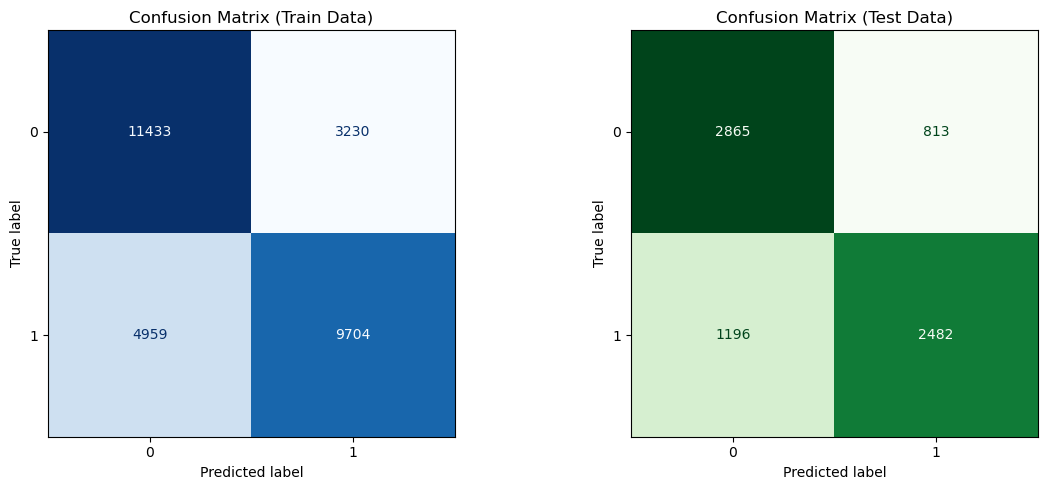

In [ ]:
# CM Train data
cm_train = confusion_matrix(ytrain_postSMOTE, y_train_pred_best_model)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=logit_model_improved.classes_)

#  CM Test Data
cm_test = confusion_matrix(ytest_postSMOTE, y_test_pred_best_model)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logit_model_improved.classes_)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


disp_train.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix (Train Data)')

disp_test.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Confusion Matrix (Test Data)')
plt.tight_layout()

The confusion matrices reveal consistent performance across training and test datasets. 

For class 0, the model achieves high true positives (11,433 in training, 2,865 in testing), while false negatives are relatively low. 

For class 1, the model captures a good number of true positives (9,704 in training, 2,482 in testing) but struggles slightly with false negatives (4,959 in training, 1,196 in testing). 

Overall, the model demonstrates balanced predictive power with room for improvement in handling class 1.

### Feature importance 

In [92]:
# extract features that have coefficient > shreshold
coefficients = logit_model_improved.coef_.flatten()
threshold = 0.01
selected_features = [
    feature for feature, coef in zip(xtrain_postSMOTE_df.columns, coefficients) if abs(coef) < threshold
]


print(f"Selected Features (|coefficient| < {threshold}): {selected_features}")
print(f"Number of Selected Features: {len(selected_features)}")

Selected Features (|coefficient| < 0.01): ['adjustments_to_credit_rating', 'credit_rating', 'prizm_code_Rural', 'occupation_Crafts', 'occupation_Professional', 'occupation_Self', 'dropped_calls_is_zero']
Number of Selected Features: 7


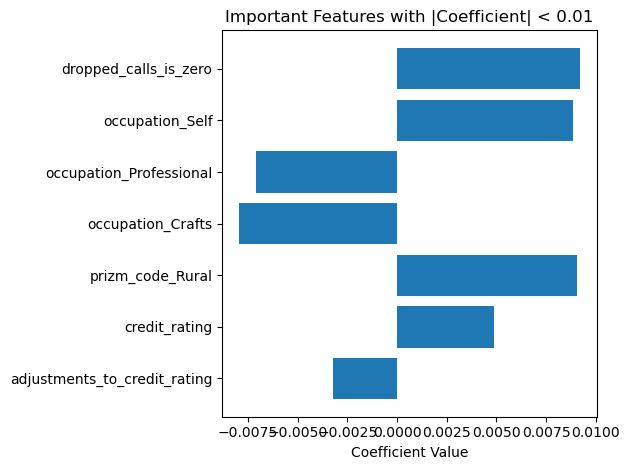

In [93]:
filtered_coefficients = [
    coef for coef in coefficients if abs(coef) < threshold
]
filtered_features = [
    feature for feature, coef in zip(xtrain_postSMOTE_df.columns, coefficients) if abs(coef) < threshold
]
plt.barh(filtered_features, filtered_coefficients)
plt.xlabel('Coefficient Value')
plt.title(f'Important Features with |Coefficient| < {threshold}')
plt.tight_layout()

The model identified 7 features with coefficients close to zero (∣coefficient∣<0.01), indicating these features have minimal influence on the model's predictions.  The features include "adjustments_to_credit_rating", "credit_rating", "prizm_code_Rural", "occupation_Crafts", "occupation_Professional", "occupation_Self", and "dropped_calls_is_zero".

While these features may not significantly impact the overall performance, they could still provide domain-specific insights. 

#### Comparing the AUC, ROC of two models


Baseline Model AUC (Train): 0.5988
Improved Model AUC (Train): 0.7901
Baseline Model AUC (Test): 0.5841
Improved Model AUC (Test): 0.7981


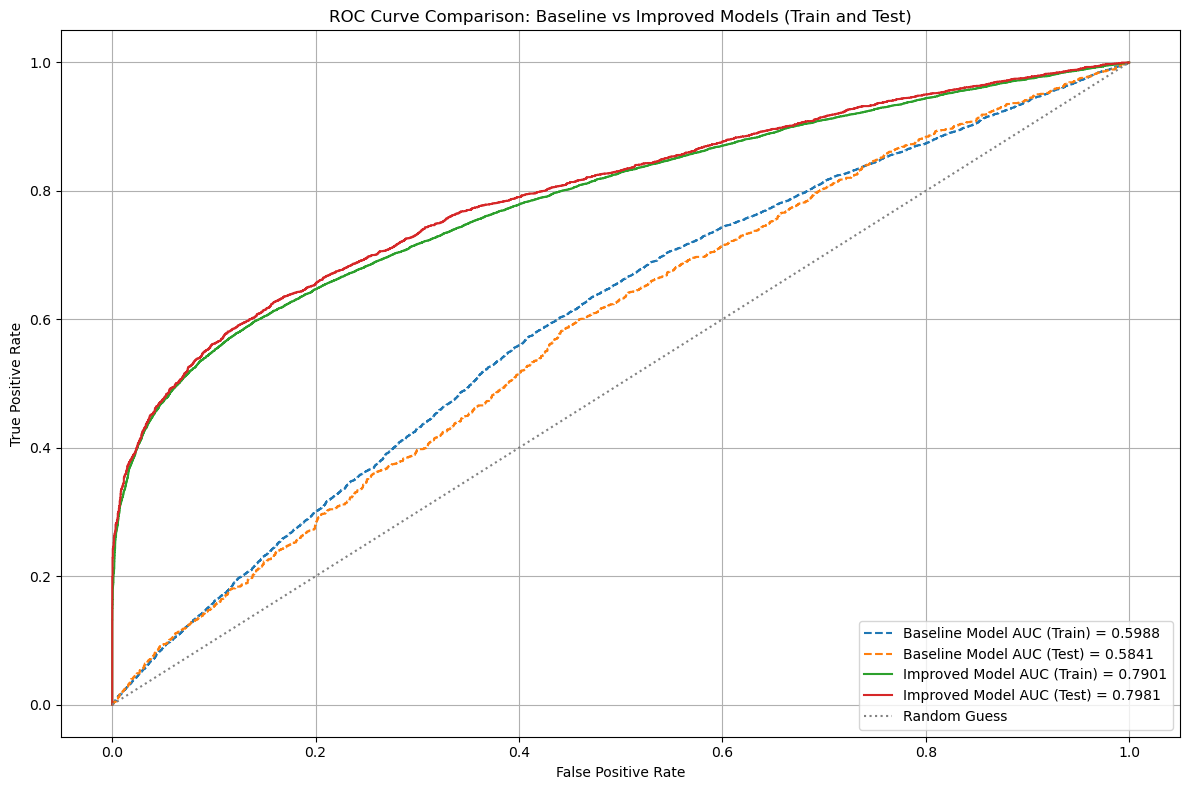

In [99]:
# Baseline Model
y_prob_baseline_train = logit_model.predict_proba(X_train[top5_features])[:, 1]
y_prob_baseline_test = logit_model.predict_proba(X_test[top5_features])[:, 1]

# Improved Model
y_prob_improved_train = logit_model_improved.predict_proba(X_train_scaled)[:, 1]
y_prob_improved_test = logit_model_improved.predict_proba(X_test_scaled)[:, 1]

# ROC, AUC (Train Data)
fpr_baseline_train, tpr_baseline_train, _ = roc_curve(y_train, y_prob_baseline_train)
auc_baseline_train = auc(fpr_baseline_train, tpr_baseline_train)

fpr_improved_train, tpr_improved_train, _ = roc_curve(ytrain_postSMOTE, y_prob_improved_train)
auc_improved_train = auc(fpr_improved_train, tpr_improved_train)

# ROC,AUC (Test Data)
fpr_baseline_test, tpr_baseline_test, _ = roc_curve(y_test, y_prob_baseline_test)
auc_baseline_test = auc(fpr_baseline_test, tpr_baseline_test)

fpr_improved_test, tpr_improved_test, _ = roc_curve(ytest_postSMOTE, y_prob_improved_test)
auc_improved_test = auc(fpr_improved_test, tpr_improved_test)

# AUC
print(f"Baseline Model AUC (Train): {auc_baseline_train:.4f}")
print(f"Improved Model AUC (Train): {auc_improved_train:.4f}")
print(f"Baseline Model AUC (Test): {auc_baseline_test:.4f}")
print(f"Improved Model AUC (Test): {auc_improved_test:.4f}")


plt.figure(figsize=(12, 8))

# Baseline Model
plt.plot(fpr_baseline_train, tpr_baseline_train, linestyle='--', label=f'Baseline Model AUC (Train) = {auc_baseline_train:.4f}')
plt.plot(fpr_baseline_test, tpr_baseline_test, linestyle='--', label=f'Baseline Model AUC (Test) = {auc_baseline_test:.4f}')

# Improved Model
plt.plot(fpr_improved_train, tpr_improved_train, linestyle='-', label=f'Improved Model AUC (Train) = {auc_improved_train:.4f}')
plt.plot(fpr_improved_test, tpr_improved_test, linestyle='-', label=f'Improved Model AUC (Test) = {auc_improved_test:.4f}')

plt.plot([0, 1], [0, 1], color='gray', linestyle=':', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Baseline vs Improved Models (Train and Test)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()


The ROC curve comparison demonstrates a clear improvement in performance between the Improved Model and the Baseline Model. The Baseline Model achieves an AUC of 0.5988 on the training data and 0.5841 on the test data, indicating weak discriminatory power and limited generalisation capability. In contrast, the Improved Model shows substantial gains, with an AUC of 0.7901 on the training data and 0.7981 on the test data, reflecting its stronger ability to distinguish between classes and generalise effectively. The Improved Model's ROC curves approach the top-left corner, signifying a significant enhancement over the Baseline Model in both training and test performance.

### Causal Inference

In [ ]:
# Let's find the binary feature that has largest discrepancy in churn rate

import numpy as np

def find_sorted_discrepancy_features(X_train, y_train):
    """
    Finds all binomial features in X_train & sort by the largest discrepancy in churn rate (y_train=1 vs y_train=0).
    
    Parameters:
    X_train (pd.DataFrame): Feature dataframe.
    y_train (pd.Series): Target variable (churn indicator).
    
    Returns:
    list of tuples: Each tuple contains a feature name and its churn rate discrepancy, sorted in descending order.
    """
    # Find binary features
    binomial_features = X_train.columns[X_train.nunique() == 2]
    
    discrepancies = []
    
    for feature in binomial_features:
        # Calculate churn rate discrepancy
        churn_rate_0 = y_train[X_train[feature] == 0].mean().values[0]
        churn_rate_1 = y_train[X_train[feature] == 1].mean().values[0]
        
        # if np.isnan(churn_rate_0) or np.isnan(churn_rate_1):
        #     continue
    
        discrepancy = abs(churn_rate_1 - churn_rate_0)
        discrepancies.append((feature, discrepancy))

    sorted_discrepancies = sorted(discrepancies, key=lambda x: x[1], reverse=True)
    
    return sorted_discrepancies

# Let's see which features have large discrepancies
sorted_features = find_sorted_discrepancy_features(X_train, y_train)
print("Features sorted by churn rate discrepancy:")
for feature, discrepancy in sorted_features:
    print(f"Feature: {feature}, Discrepancy: {discrepancy:.4f}")

Features sorted by churn rate discrepancy:
Feature: retention_offers_accepted_is_zero, Discrepancy: 0.1893
Feature: made_call_to_retention_team, Discrepancy: 0.1854
Feature: retention_calls_is_zero, Discrepancy: 0.1854
Feature: handset_web_capable, Discrepancy: 0.1173
Feature: total_peak_off_peak_calls_is_zero, Discrepancy: 0.0821
Feature: unanswered_calls_is_zero, Discrepancy: 0.0718
Feature: total_care_issues_is_zero, Discrepancy: 0.0648
Feature: received_calls_is_zero, Discrepancy: 0.0631
Feature: total_calls_is_zero, Discrepancy: 0.0588
Feature: occupation_Retired, Discrepancy: 0.0567
Feature: handset_refurbished, Discrepancy: 0.0536
Feature: dropped_calls_is_zero, Discrepancy: 0.0494
Feature: value_added_service_usage_is_zero, Discrepancy: 0.0425
Feature: perc_change_revenues_is_zero, Discrepancy: 0.0376
Feature: age_hh1_is_zero, Discrepancy: 0.0356
Feature: marital_status_Unknown, Discrepancy: 0.0345
Feature: income_group_is_zero, Discrepancy: 0.0340
Feature: occupation_Student, 

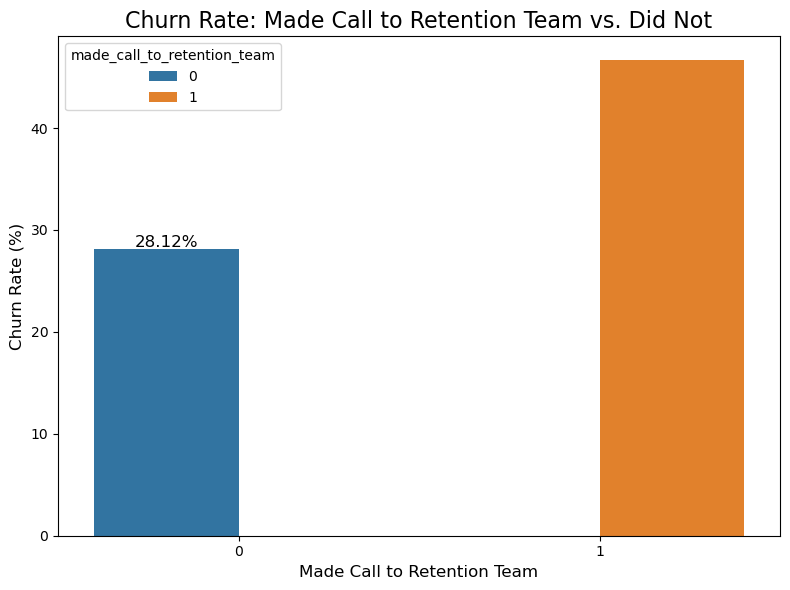

In [ ]:
churn_rate_by_call = pd.concat([X_train['made_call_to_retention_team'], y_train], axis=1)
churn_rate_by_call.columns = ['made_call_to_retention_team', 'churn']  

grouped_data = churn_rate_by_call.groupby('made_call_to_retention_team')['churn'].mean().reset_index()
grouped_data['churn_rate'] = grouped_data['churn'] * 100  

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x='made_call_to_retention_team',
    y='churn_rate',
    data=grouped_data,
    ax=ax,
    hue='made_call_to_retention_team',
    palette=["#1f77b4", "#ff7f0e"]  # Set colors for the bars (blue for no churn, orange for churn)
)

ax.set_title('Churn Rate: Made Call to Retention Team vs. Did Not', fontsize=16)
ax.set_xlabel('Made Call to Retention Team', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)

for p in ax.patches[:-1]:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Question 1: Does making a call to the retention team (made_call_to_retention_team) causally affect the churn rate, or is it merely correlated with it?
**Feature of my choice: made_call_to_retention_team**

Based on the binomial feature exploration, we find that the feature "made_call_to_retention_team" has the highest discrepancy in churn rate. Let's explore if this discrepancy implies casality. It’s important to investigate whether the act of calling the retention team leads to a increase in churn, or if other underlying factors (e.g., customer dissatisfaction, prior retention efforts) are influencing both the likelihood of calling and the likelihood of churn.

The findings from this causal analysis will guide our next steps, helping us decide whether to (1) retrain the retention team or (2) reward them for their performance.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# # Load scaled data
# df_train = pd.read_csv('data/train_clean_scaled.csv')

standard_scaler = StandardScaler()
standard_scaler.fit(X_train.set_index('customer_id'))

X_train_scaled = standard_scaler.transform(X_train.set_index('customer_id'))

# Lasso Like Logistic Regression
logit = LogisticRegressionCV(
    Cs=np.logspace(-4, 4, 10),
    cv=5,
    penalty='l1',
    solver='saga',
    random_state=109,
    max_iter=1000,
    n_jobs=-1,
    scoring=make_scorer(accuracy_score)
)


logit.fit(X_train_scaled, y_train.values.ravel())

y_pred = logit.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {accuracy:.4f}")


Train Accuracy: 0.7179


   made_call_to_retention_team  propensity_scores
0                            0           0.240159
1                            0           0.236848
2                            0           0.247788
3                            0           0.435743
4                            0           0.277643


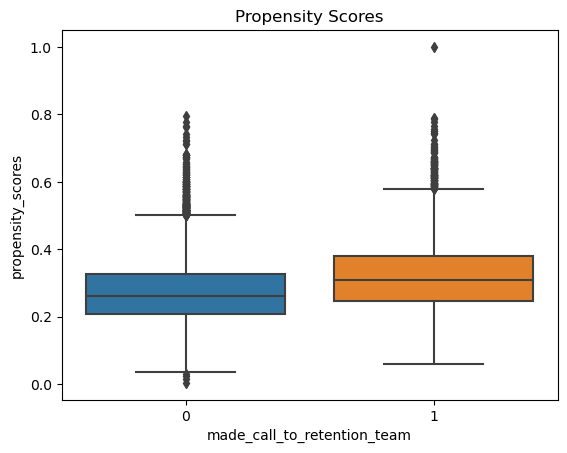

In [ ]:
import seaborn as sns

# Estimate propensity score
propensity_scores = logit.predict_proba(X_train_scaled)[:, 1]
X = X_train.copy()
X['propensity_scores'] = propensity_scores
X['made_call_to_retention_team'] = y_train 

# Visualize the propensity scores
print(pd.DataFrame({'made_call_to_retention_team': X['made_call_to_retention_team'], 'propensity_scores': X['propensity_scores']}).head())
ax = sns.boxplot(y='propensity_scores', x='made_call_to_retention_team', data=X)
ax.set_title("Propensity Scores")
plt.show()

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns[1:])
X_train_scaled_df['id'] = range(0, X_train_scaled_df.shape[0])
X_train_scaled_df['made_call_to_retention_team'] = X_train['made_call_to_retention_team']

In [ ]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

# Create a PsmPy object for propensity score matching
psm = PsmPy(X_train_scaled_df, treatment='made_call_to_retention_team', indx='id', exclude=[])

# Apply logistic propensity score matching
psm.logistic_ps(balance=False)

# Perform k-nearest neighbor matching using propensity scores
psm.knn_matched(matcher='propensity_score', replacement=True, caliper=None, drop_unmatched=True)

# To get the means from the matched data:
matched_callers = psm.df_matched[psm.df_matched['made_call_to_retention_team'] == 1]['id'].values
matched_non_callers = psm.df_matched[psm.df_matched['made_call_to_retention_team'] == 0]['id'].values

# Calculate churn rates for both groups
callers_churn = y_train.iloc[matched_callers]  
non_callers_churn = y_train.iloc[matched_non_callers]  

callers_churn_rate = (callers_churn == 1).mean() 
non_callers_churn_rate = (non_callers_churn == 1).mean()  

# Print the results
print("Churn Rate (Callers):", callers_churn_rate)
print("Churn Rate (Non-Callers):", non_callers_churn_rate)
print("Adjusted Difference in Churn Rate:", callers_churn_rate - non_callers_churn_rate)

ModuleNotFoundError: No module named 'psmpy'

In [ ]:
### ARCHIVE - TOOK TOO LONG TO RUN THE MODEL BELOW, SO GAVE UP

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# # Let's explore different types of boosting to find the best hyperparameters

# # models
# models = {
#     'AdaBoost': AdaBoostClassifier(),
#     'GradientBoosting': GradientBoostingClassifier(),
#     'XGBoost': XGBClassifier(eval_metric='logloss')
# }

# # hyperparameters
# param_grids = {
#     'AdaBoost': {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__learning_rate': [0.4, 0.05],
#     },
#     'GradientBoosting': {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__learning_rate': [0.4, 0.05],
#         'classifier__max_depth': [6]
#     },
#     'XGBoost': {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__learning_rate': [0.4, 0.05],
#         'classifier__max_depth': [6]
#     }
# }

# # Store results for each model
# results = {}

# # Loop through models and perform GridSearchCV
# for model_name, model in models.items():
#     print(f"Training {model_name} model...")
    
#     # Create pipeline with preprocessor and classifier
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])
    
#     # Perform grid search
#     grid = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_train_ci, y_train_ci)
    
#     # Get best estimator
#     best_model = grid.best_estimator_
    
#     # Evaluate model
#     train_accuracy = best_model.score(X_test_ci, y_test_ci)
#     cv_accuracy = grid.cv_results_['mean_test_score'].max()
    
#     # Store results
#     results[model_name] = {
#         'best_model': best_model,
#         'best_params': grid.best_params_,
#         'train_accuracy': train_accuracy,
#         'cv_accuracy': cv_accuracy
#     }

# # Print results for each model
# for model_name, result in results.items():
#     print(f"Results for {model_name}:")
#     print(f"  Best hyperparameters: {result['best_params']}")
#     print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
#     print(f"  CV Accuracy: {result['cv_accuracy']:.4f}\n")
